In [1]:
import pandas as pd

In [59]:
dataframe = pd.read_csv("FYP data/new copy/moving chair train/moving_chair_train_combined.csv")

In [60]:
display(dataframe)

type   seq                timestamp  taget_seq   taget  \
0    CSI_DATA  3443  2024-04-02 17:28:52.426          1  static   
1    CSI_DATA  3444  2024-04-02 17:28:52.434          1  static   
2    CSI_DATA  3445  2024-04-02 17:28:52.444          1  static   
3    CSI_DATA  3446  2024-04-02 17:28:52.463          1  static   
4    CSI_DATA  3447  2024-04-02 17:28:52.473          1  static   
..        ...   ...                      ...        ...     ...   
447  CSI_DATA  3436  2024-04-02 17:28:52.353          2  static   
448  CSI_DATA  3437  2024-04-02 17:28:52.365          2  static   
449  CSI_DATA  3439  2024-04-02 17:28:52.383          2  static   
450  CSI_DATA  3440  2024-04-02 17:28:52.395          2  static   
451  CSI_DATA  3442  2024-04-02 17:28:52.413          2  static   

                   mac  rssi  rate  sig_mode  mcs  ...  ampdu_cnt  \
0    1a:00:00:00:00:00   -50    11         1    0  ...          0   
1    1a:00:00:00:00:00   -50    11         1    0  ...          0   
2    1a:00:00:00:00:00   -50    11         1    0  ...          0   
3    1a:00:00:00:00:00   -50    11         1    0  ...          0   
4    1a:00:00:00:00:00   -50    11         1    0  ...          0   
..                 ...   ...   ...       ...  ...  ...        ...   
447  1a:00:00:00:00:00   -51    11         1    0  ...          0   
448  1a:00:00:00:00:00   -50    11         1    0  ...          0   
449  1a:00:00:00:00:00   -50    11         1    0  ...          0   
450  1a:00:00:00:00:00   -50    11         1    0  ...          0   
451  1a:00:00:00:00:00   -50    11         1    0  ...          0   

     channel_primary  channel_secondary  local_timestamp  ant  sig_len  \
0                 11                  2         39912962    0       44   
1                 11                  2         39921039    0       44   
2                 11                  2         39929472    0       44   
3                 11                  2         39949492    0       44   
4                 11                  2         39959499    0       44   
..               ...                ...              ...  ...      ...   
447               11                  2         39839480    0       44   
448               11                  2         39849493    0       44   
449               11                  2         39869503    0       44   
450               11                  2         39881459    0       44   
451               11                  2         39899476    0       44   

     rx_state  len  first_word_invalid  \
0           0  104                   0   
1           0  104                   0   
2           0  104                   0   
3           0  104                   0   
4           0  104                   0   
..        ...  ...                 ...   
447         0  104                   0   
448         0  104                   0   
449         0  104                   0   
450         0  104                   0   
451         0  104                   0   

                                                  data  
0    [7, 14, 7, 14, 8, 13, 8, 13, 8, 13, 7, 13, 7, ...  
1    [6, -13, 6, -13, 5, -13, 6, -13, 6, -13, 6, -1...  
2    [8, 12, 9, 12, 9, 11, 9, 12, 9, 12, 9, 12, 8, ...  
3    [13, -2, 13, -3, 13, -3, 13, -3, 13, -3, 13, -...  
4    [-10, 10, -9, 10, -9, 10, -9, 10, -10, 10, -9,...  
..                                                 ...  
447  [-10, -14, -11, -14, -11, -13, -11, -13, -11, ...  
448  [13, 1, 13, 1, 13, 0, 14, 0, 13, 0, 13, 1, 12,...  
449  [-2, 13, -1, 13, 0, 13, -1, 13, -1, 13, -1, 13...  
450  [-9, 13, -9, 13, -8, 13, -8, 13, -9, 12, -8, 1...  
451  [11, -4, 11, -5, 11, -5, 11, -5, 11, -5, 10, -...  

[452 rows x 28 columns]

In [61]:
import json
dataframe['data'] = dataframe['data'].apply(json.loads)


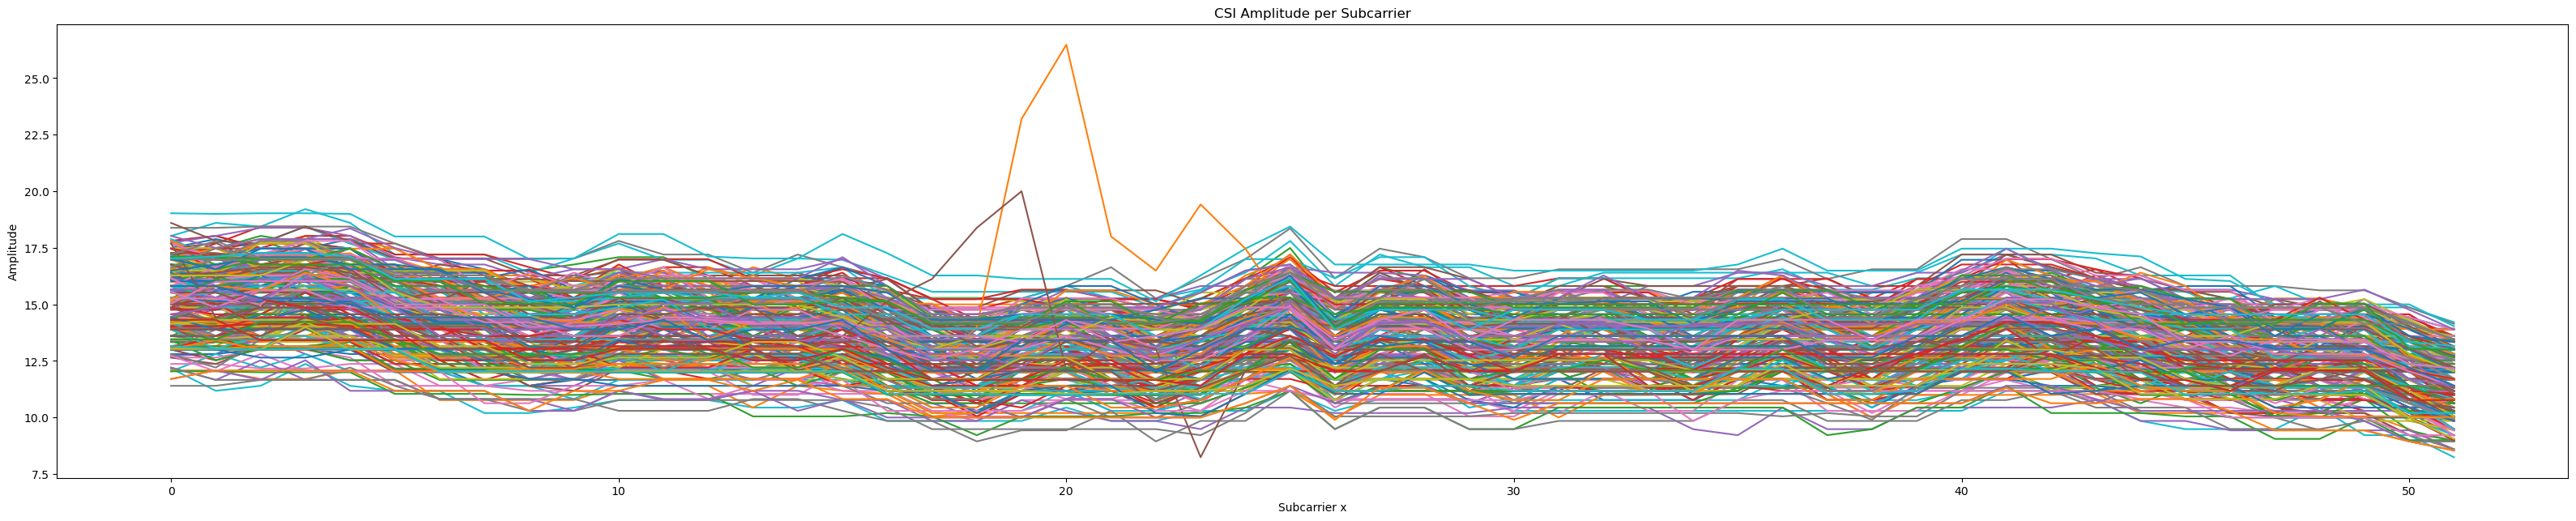

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'data' is your data and it has a column 'data' with the CSI data
# Each data in 'data' column contains a list of 128 values (64 subcarriers * 2 bytes each)

# https://www.math-only-math.com/amplitude-or-argument-of-a-complex-number.html
def calculate_amplitude_phase(pair):
    real_part = pair[0]
    imaginary_part = pair[1]
    amplitude = np.sqrt(real_part ** 2 + imaginary_part ** 2)
    return amplitude

# Initialize subcarrier indices
num_subcarriers = 52
subcarrier_indices = np.arange(num_subcarriers)

# Initialize a figure
plt.figure(figsize=(40, 16))
amplitudes = []


# Iterate over datas in the data
for x, data in dataframe.iterrows():
    #print(type(data['data']))
    # Split the data into pairs (assuming the data is already a list of numbers)
    pairs = [data['data'][i:i+2] for i in range(0, len(data['data']), 2)][:num_subcarriers]
    #print(pairs)
    #print(subcarrier_indices)
    #https://stackoverflow.com/questions/312443/how-do-i-split-a-list-into-equally-sized-chunks
    # Calculate amplitude and phase for each pair
    amplitudes = [calculate_amplitude_phase(pair) for pair in pairs]
    
    #print(amplitudes)
    # Plot amplitude for current data
    plt.subplot(2, 1, 1)  # Two datas, one column, first plot
    plt.plot(subcarrier_indices, amplitudes, label=f'data {x}')
    plt.xlabel('Subcarrier x')
    plt.ylabel('Amplitude')
    plt.title('CSI Amplitude per Subcarrier')

plt.show()

[11.704699910719626, 12.083045973594572, 12.083045973594572, 12.083045973594572, 12.083045973594572, 11.180339887498949, 11.180339887498949, 11.180339887498949, 10.295630140987, 11.180339887498949, 11.180339887498949, 11.661903789690601, 11.661903789690601, 11.180339887498949, 11.661903789690601, 10.816653826391969, 10.816653826391969, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.63014581273465, 11.40175425099138, 9.899494936611665, 11.313708498984761, 11.313708498984761, 10.63014581273465, 9.899494936611665, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 10.63014581273465, 11.313708498984761, 10.63014581273465, 10.63014581273465, 10.816653826391969, 10.816653826391969, 10.295630140987, 9.433981132056603, 9.433981132056603, 9.433981132056603, 8.94427190999916, 8.54400374531753]


C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2703566003.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2703566003.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2703566003.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2703566003.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_d

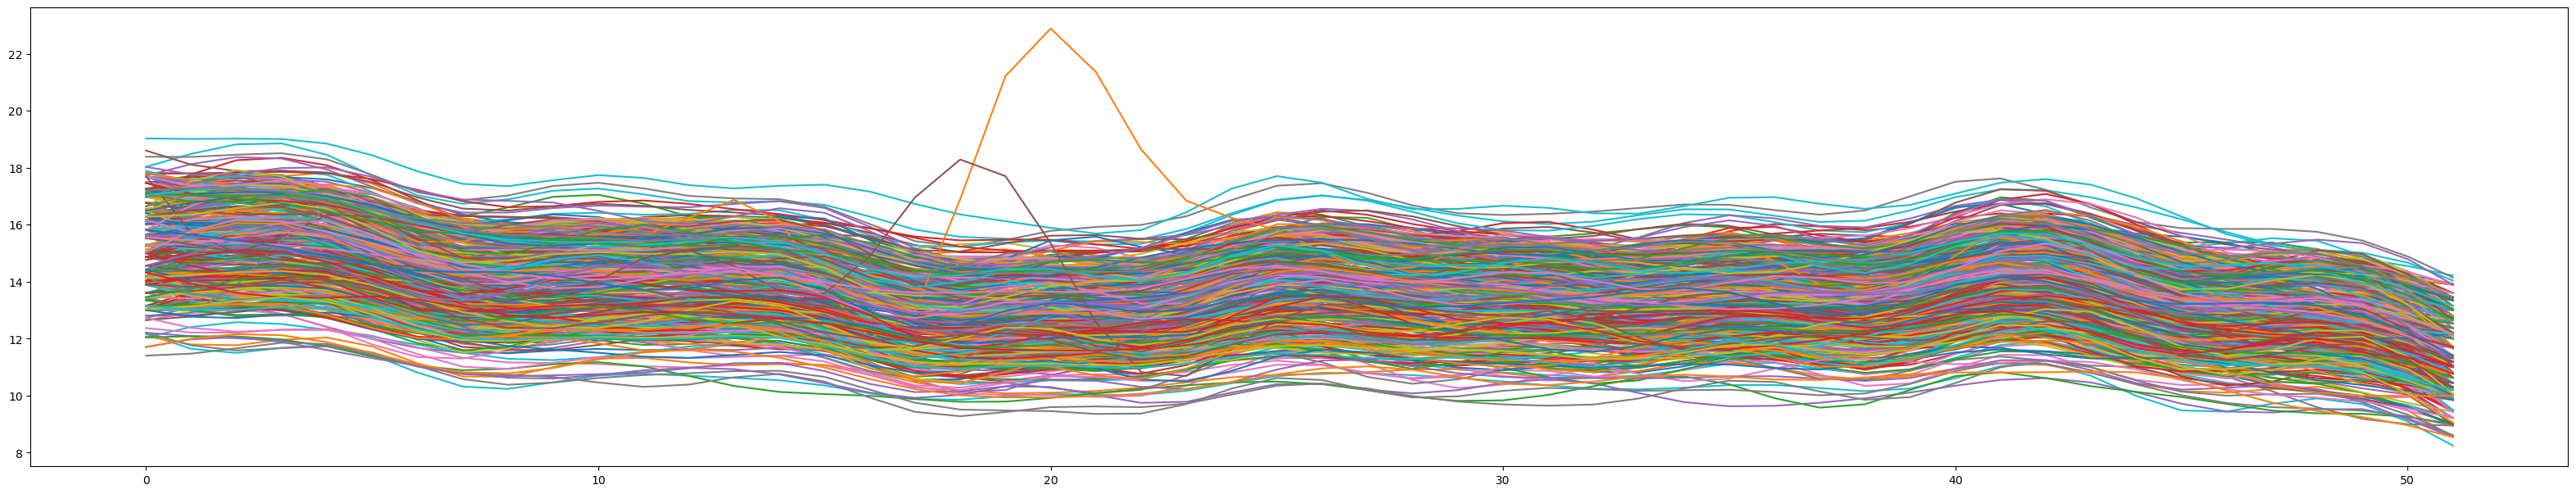

            label                                               data
0    moving chair  [15.652567143951071, 15.453434213044233, 15.38...
1    moving chair  [14.31852629900604, 14.179847904457457, 14.179...
2    moving chair  [14.422381504367689, 14.452708393624354, 14.66...
3    moving chair  [13.153507719303688, 13.221655755911826, 13.35...
4    moving chair  [14.14219819820207, 13.661827004601552, 13.486...
..            ...                                                ...
447  moving chair  [17.20489317863278, 17.28927327615928, 17.2932...
448  moving chair  [13.03850258976912, 13.130225856712224, 13.311...
449  moving chair  [13.152881265805338, 13.010309359454723, 13.01...
450  moving chair  [15.811661781611061, 15.645961464626804, 15.45...
451  moving chair  [11.704919890702921, 11.993406295523217, 12.15...

[452 rows x 2 columns]


In [63]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

#20 /(100 / 2)
# Apply the filter to each row's data
# cutoff_frequency = 2.5  # for example, this needs to be defined by your requirements
# sampling_rate = 30  # for example, this also needs to be defined by your requirements
# order = 5  # The order of the filter (number of taps)
fs = 100       # Sample rate in Hz, you need to determine this from your timestamps
cutoff = 20     # Desired cutoff frequency of the filter in Hz
order = 8         # Filter order
print(amplitudes)

new_dataframe = pd.DataFrame(columns=['label','data'])

plt.figure(figsize=(40, 16))
for x, data in dataframe.iterrows():
    pairs = [data['data'][i:i+2] for i in range(0, len(data['data']), 2)][:num_subcarriers]
    amplitudes = [calculate_amplitude_phase(pair) for pair in pairs]
    filtered_amplitude = butter_lowpass_filter(amplitudes,cutoff,fs,order)
    #print(filtered_amplitude)
    #print(type(filtered_amplitude))
    row_data = {'label': 'moving chair', 'data': [filtered_amplitude]}
    df2 = pd.DataFrame(row_data)    #row_to_append = pd.Series(['open door']+filtered_amplitude  , index=['label','data'])
    new_dataframe = new_dataframe.append(df2, ignore_index=True)
    plt.subplot(2, 1, 1)
    plt.plot(subcarrier_indices, filtered_amplitude, label=f'data {x}')
plt.show()
print(new_dataframe)

[13.038404810405298, 13.601470508735444, 13.45362404707371, 14.212670403551895, 14.212670403551895, 12.806248474865697, 12.806248474865697, 12.806248474865697, 13.45362404707371, 13.45362404707371, 14.212670403551895, 14.212670403551895, 14.212670403551895, 14.212670403551895, 14.212670403551895, 14.422205101855956, 13.892443989449804, 13.038404810405298, 13.038404810405298, 14.422205101855956, 14.422205101855956, 15.264337522473747, 14.7648230602334, 15.231546211727817, 16.15549442140351, 17.46424919657298, 16.76305461424021, 16.76305461424021, 17.46424919657298, 16.492422502470642, 16.76305461424021, 17.72004514666935, 17.72004514666935, 17.72004514666935, 18.681541692269406, 18.681541692269406, 19.6468827043885, 18.681541692269406, 18.681541692269406, 19.6468827043885, 20.8806130178211, 21.840329667841555, 21.840329667841555, 21.18962010041709, 21.540659228538015, 21.93171219946131, 21.470910553583888, 21.470910553583888, 21.470910553583888, 21.95449840010015, 21.095023109728988, 20

C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2432068966.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2432068966.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2432068966.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(df2, ignore_index=True)
C:\Users\horse\AppData\Local\Temp\ipykernel_19316\2432068966.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_d

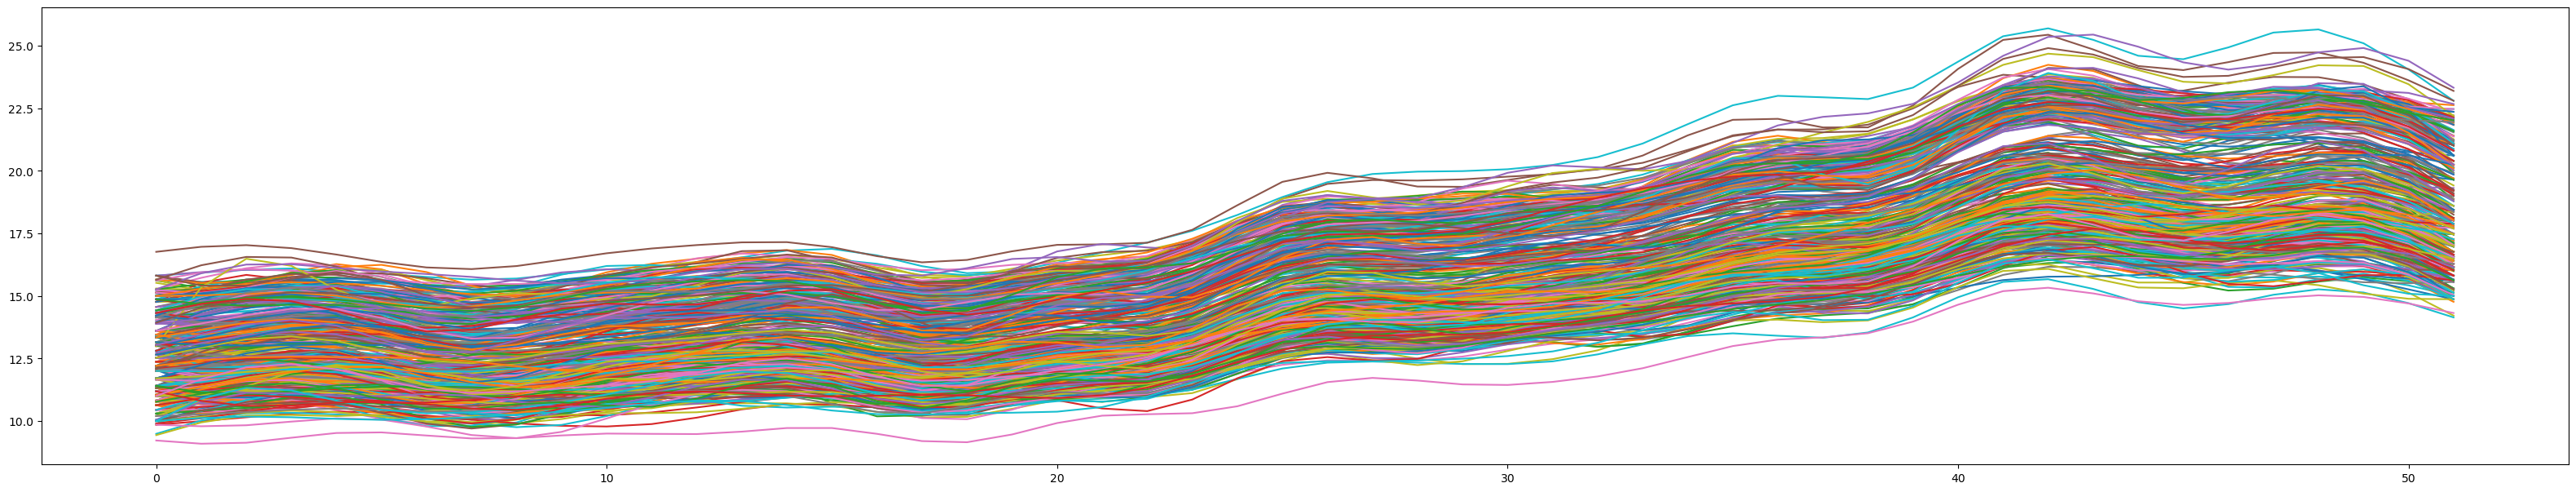

             label                                               data
0     moving chair  [15.652567143951071, 15.453434213044233, 15.38...
1     moving chair  [14.31852629900604, 14.179847904457457, 14.179...
2     moving chair  [14.422381504367689, 14.452708393624354, 14.66...
3     moving chair  [13.153507719303688, 13.221655755911826, 13.35...
4     moving chair  [14.14219819820207, 13.661827004601552, 13.486...
...            ...                                                ...
1402      stand up  [12.649715889658898, 12.980112309553355, 13.35...
1403      stand up  [12.206793339771595, 12.421107322063287, 12.54...
1404      stand up  [14.422536181477318, 14.73397054075945, 14.918...
1405      stand up  [14.318385843685833, 14.681069650858555, 14.87...
1406      stand up  [13.038686595299799, 13.458050136025763, 13.85...

[1407 rows x 2 columns]


In [65]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the filter to each row's data
# cutoff_frequency = 2.5  # for example, this needs to be defined by your requirements
# sampling_rate = 30  # for example, this also needs to be defined by your requirements
# order = 5  # The order of the filter (number of taps)
dataframe = pd.read_csv("FYP data/new copy/stand up train/stand_up_train_combined.csv")
dataframe['data'] = dataframe['data'].apply(json.loads)

fs = 100       # Sample rate in Hz, you need to determine this from your timestamps
cutoff = 20     # Desired cutoff frequency of the filter in Hz
order = 8         # Filter order
amplitudes = []


# Iterate over datas in the data
for x, data in dataframe.iterrows():
    #print(type(data['data']))
    # Split the data into pairs (assuming the data is already a list of numbers)
    pairs = [data['data'][i:i+2] for i in range(0, len(data['data']), 2)][:num_subcarriers]
    #print(pairs)
    #print(subcarrier_indices)
    #https://stackoverflow.com/questions/312443/how-do-i-split-a-list-into-equally-sized-chunks
    # Calculate amplitude and phase for each pair
    amplitudes = [calculate_amplitude_phase(pair) for pair in pairs]
    #print(amplitudes)
    # Plot amplitude for current data
    
print(amplitudes)

plt.figure(figsize=(40, 16))
for x, data in dataframe.iterrows():
    pairs = [data['data'][i:i+2] for i in range(0, len(data['data']), 2)][:num_subcarriers]
    amplitudes = [calculate_amplitude_phase(pair) for pair in pairs]
    filtered_amplitude = butter_lowpass_filter(amplitudes,cutoff,fs,order)
    #print(filtered_amplitude)
    #print(type(filtered_amplitude))
    row_data = {'label': 'stand up', 'data': [filtered_amplitude]}
    df2 = pd.DataFrame(row_data)    #row_to_append = pd.Series(['open door']+filtered_amplitude  , index=['label','data'])
    new_dataframe = new_dataframe.append(df2, ignore_index=True)
    plt.subplot(2, 1, 1)
    plt.plot(subcarrier_indices, filtered_amplitude, label=f'data {x}')
plt.show()
print(new_dataframe)

In [66]:
display(new_dataframe)

label                                               data
0     moving chair  [15.652567143951071, 15.453434213044233, 15.38...
1     moving chair  [14.31852629900604, 14.179847904457457, 14.179...
2     moving chair  [14.422381504367689, 14.452708393624354, 14.66...
3     moving chair  [13.153507719303688, 13.221655755911826, 13.35...
4     moving chair  [14.14219819820207, 13.661827004601552, 13.486...
...            ...                                                ...
1402      stand up  [12.649715889658898, 12.980112309553355, 13.35...
1403      stand up  [12.206793339771595, 12.421107322063287, 12.54...
1404      stand up  [14.422536181477318, 14.73397054075945, 14.918...
1405      stand up  [14.318385843685833, 14.681069650858555, 14.87...
1406      stand up  [13.038686595299799, 13.458050136025763, 13.85...

[1407 rows x 2 columns]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.base import clone
from sklearn.preprocessing import minmax_scale

# Assuming 'new_dataframe' is your DataFrame and it is already loaded

# Step 1: Preprocess the Data
# Convert the 'data' column into a 2D numpy array
training_data = np.array(new_dataframe['data'].tolist())

# Normalize the data
X = minmax_scale(training_data, feature_range=(0, 1)) 

# Step 2: Split the Data
# You will need the labels if you are doing supervised learning later on
labels = new_dataframe['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.2, random_state=21)

# Step 3: Create the RBM
logistic = linear_model.LogisticRegression(solver="lbfgs")
rbm = BernoulliRBM(n_components=256, random_state=42, verbose=True, n_iter=200, learning_rate=0.01)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])
# Step 4: Train the RBM
rbm_features_classifier.fit(X_train, Y_train)



[BernoulliRBM] Iteration 1, pseudo-likelihood = -35.66, time = 0.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -35.57, time = 0.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -35.61, time = 0.09s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -35.41, time = 0.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -35.30, time = 0.10s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -34.84, time = 0.10s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -34.35, time = 0.09s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -33.55, time = 0.09s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -32.91, time = 0.09s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -32.00, time = 0.09s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -31.61, time = 0.10s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -31.19, time = 0.10s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -31.20, time = 0.11s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -31.11, time = 0.10s
[BernoulliRBM] Iteration 15, 

C:\Users\horse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.01, n_iter=200, random_state=42,
                              verbose=True)),
                ('logistic', LogisticRegression())])

In [73]:
import pandas as pd
import json
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Load your evaluation data
stand_up_eval = pd.read_csv("FYP data/new copy/stand up evaluate/stand_up_evaluate_combined.csv")
sit_down_eval = pd.read_csv("FYP data/new copy/sit down evaluate/sit_down_evaluate_combined.csv")
moving_chair_eval = pd.read_csv("FYP data/new copy/moving chair evaluate/moving_chair_evaluate_combined.csv")

# Make sure to preprocess your data here if necessary (e.g., apply butter_lowpass_filter)
final_eval_dataframe = pd.DataFrame(columns=['label','data'])

# Combine your evaluation datasets if necessary and preprocess (filtering, scaling)
# Assuming you have a function to preprocess a single DataFrame
stand_up_eval['data'] = stand_up_eval['data'].apply(json.loads)
sit_down_eval['data'] = sit_down_eval['data'].apply(json.loads)
moving_chair_eval['data'] = moving_chair_eval['data'].apply(json.loads)

#eval_dataframes = [stand_up_eval, sit_down_eval, moving_chair_eval]
#eval_data = pd.concat(eval_dataframes, ignore_index=True)
#eval_data['data'] = eval_data['data'].apply(json.loads)

for x, data in stand_up_eval.iterrows():
    pairs = [data['data'][i:i+2] for i in range(0, len(data['data']), 2)][:num_subcarriers]
    amplitudes = [calculate_amplitude_phase(pair) for pair in pairs]
    filtered_amplitude = butter_lowpass_filter(amplitudes,cutoff,fs,order)
    #print(filtered_amplitude)
    #print(type(filtered_amplitude))
    row_data = {'label': 'stand up', 'data': [filtered_amplitude]}
    df2 = pd.DataFrame(row_data)    #row_to_append = pd.Series(['open door']+filtered_amplitude  , index=['label','data'])
    final_eval_dataframe = final_eval_dataframe.append(df2, ignore_index=True)
    plt.subplot(2, 1, 1)
    plt.plot(subcarrier_indices, filtered_amplitude, label=f'data {x}')
plt.show()
print(final_eval_dataframe)

# Use the same scaler parameters from the training dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(training_data)  # Fit on the training data only
X_eval = scaler.transform(np.array(final_eval_dataframe['data'].tolist()))  # Transform the evaluation data

# Labels for evaluation data
Y_eval = final_eval_dataframe['label'].values

# Predict using the fitted model
Y_pred = rbm_features_classifier.predict(X_eval)

# Evaluation
print(
    "Classification report for RBM features classifier:\n",
    metrics.classification_report(Y_eval, Y_pred)
)

TypeError: the JSON object must be str, bytes or bytearray, not list

In [68]:
from sklearn import metrics

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using RBM features:
              precision    recall  f1-score   support

moving chair       1.00      1.00      1.00        90
    sit down       1.00      1.00      1.00       100
    stand up       1.00      1.00      1.00        92

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282




In [30]:
from joblib import dump

# Save the model to a file
dump(rbm_features_classifier, 'rbm_logistic_pipeline.joblib')

['rbm_logistic_pipeline.joblib']